In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Read the City and Ride Data
#City data
city_data = "data/city_data.csv"
#Ride data
ride_data = "data/ride_data.csv"



In [2]:
# Display the data table for preview

city_data_df = pd.read_csv(city_data)
city_data_df.head()


city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
# Read ride data file with the pandas library.
# Display the data table for preview
ride_data_df = pd.read_csv(ride_data)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
# Combine the data into a single dataset
pyber_data = pd.merge(city_data_df, ride_data_df, how= "left", on=["city","city"])
pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [5]:
#Find the average fare per city - CITYWISE Average Fare
average_fare = pyber_data.groupby("city")["fare"].mean().round(2)
average_fare.head()

city
Amandaburgh      24.64
Barajasview      25.33
Barronchester    36.42
Bethanyland      32.96
Bradshawfurt     40.06
Name: fare, dtype: float64

In [6]:
#Find the total rides per city. Cities grouped by Total Rides
total_rides = pyber_data.groupby("city")["ride_id"].count()
total_rides.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [7]:
#Find the total number of drivers per city.Cities - grouped by driver count 
total_drivers = pyber_data.groupby("city")["driver_count"].sum()
total_drivers.head()

city
Amandaburgh      216
Barajasview      572
Barronchester    176
Bethanyland      396
Bradshawfurt      70
Name: driver_count, dtype: int64

In [8]:
# find types of cities. 
city_type = city_data_df.set_index('city')['type']
city_type.value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

## Bubble Plot of Ride Sharing Data

In [9]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [10]:
# constructing new Data Frame

df_cities = pd.DataFrame({"Average Fare per City":average_fare,
                 "Number of Rides": total_rides,
                 "Number of Drivers": total_drivers,
                 "City Type": city_type
})
df_cities.head()

,Average Fare per City,Number of Rides,Number of Drivers,City Type
Amandaburgh,24.64,18,216,Urban
Barajasview,25.33,22,572,Urban
Barronchester,36.42,16,176,Suburban
Bethanyland,32.96,18,396,Suburban
Bradshawfurt,40.06,10,70,Rural


In [11]:
#Setting Values - Urban/subUrban/Rural
#Urban
urban = df_cities.loc[df_cities["City Type"]== "Urban"]

#suburban
suburban = df_cities.loc[df_cities["City Type"]== "Suburban"]

#rural
rural = df_cities.loc[df_cities["City Type"]== "Rural"]

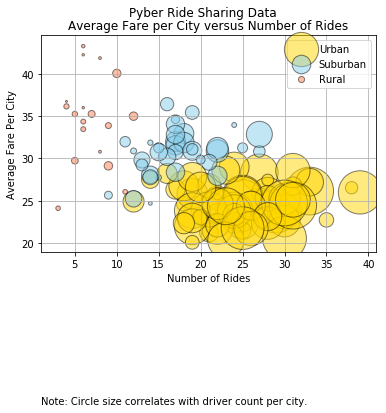

In [12]:
#Urban
plt.scatter(urban["Number of Rides"], urban["Average Fare per City"], 
            color = "gold", edgecolors="black", s = urban["Number of Drivers"], 
            label = "Urban", alpha = 0.5, linewidth = 1)

#Suburban
plt.scatter(suburban["Number of Rides"], 
            suburban["Average Fare per City"], 
            color = "skyblue", edgecolors ="black", s = suburban["Number of Drivers"], label = "Suburban", 
            alpha = 0.5, linewidth = 1)

#Rural
plt.scatter(rural["Number of Rides"], rural["Average Fare per City"],
            color = "coral", edgecolors = "black", s = rural["Number of Drivers"], 
            label = "Rural", alpha = 0.5, linewidth = 1)


#Add asthetics, title, x axis label and y axis label.

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size
plt.grid(True)

plt.suptitle('Pyber Ride Sharing Data')
plt.title("Average Fare per City versus Number of Rides")
plt.xlabel("Number of Rides")
plt.ylabel("Average Fare Per City")
plt.text(1,1, "Note: Circle size correlates with driver count per city.")

#Add the legend
plt.legend(loc= "best")


plt.savefig("Average_Fare_citywiseNumber_of_Rides.png")
#Show plot.
plt.show("Average_Fare_citywiseNumber_of_Rides.png")

## Total Fares by City Type

In [13]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


In [14]:
#Sum of fares by city type.

city_fare_pie = pyber_data.groupby(["type"])["fare"].sum()
city_fare_pie

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [15]:
#Use the City Pie index for wedge labels.

city_fare_pie.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

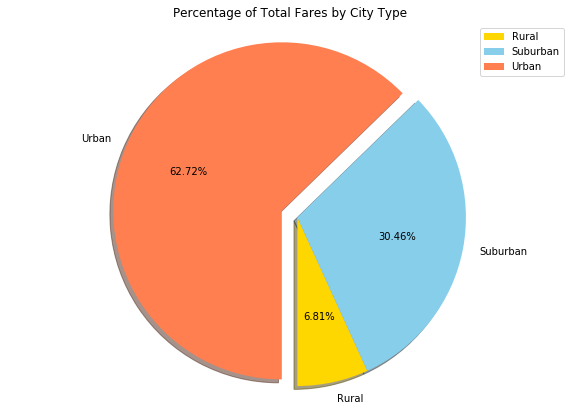

In [16]:
#Set the colors of each section of the pie chart.
colors = ["gold", "skyblue", "coral"]

#Only explode the third section of the pie chart.

explode = (0,0, 0.1)

#Create the pie chart.
plt.pie(city_fare_pie, labels = city_fare_pie.index, 
        autopct = "%1.2f%%", 
        colors = colors, 
        explode = explode, 
        shadow = True, 
        startangle = 270)

#Tell Matplotlib that we want a pie chart with equal axes.
plt.axis("equal")

#Add the legend.
plt.title("Percentage of Total Fares by City Type")
plt.legend(loc = "upper right")
# save figure 
plt.savefig("Percentage_of_Total_Fares_by_CityType.png")
#show
plt.show("Percentage_of_Total_Fares_by_CityType.png")


## Total Rides by City Type

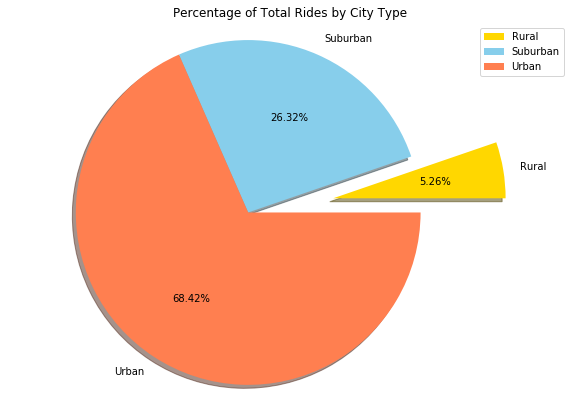

In [17]:
# Calculate Ride Percents
#Total rides by city type.

city_rides_pie = pyber_data.groupby(["type"])["ride_id"].count()
city_rides_pie

# Build Pie Chart

#Use the City Pie index for wedge labels.
city_rides_pie.index

#Set the colors of each section of the pie chart.
colors = ["gold", "skyblue", "coral"]

#Only explode the first section of the pie chart.
explode = (0.5,0,0)

#Create the pie chart.
plt.pie(city_rides_pie, labels = city_fare_pie.index, autopct = "%1.2f%%", 
        colors = colors,
        explode = explode, 
        shadow = True)

#Tell Matplotlib that we wnat the pie chart to have equal axes.
plt.axis("equal")

#Add the legend.
plt.legend(loc = "best")
plt.title("Percentage of Total Rides by City Type")

# Save Figure
plt.savefig("Percentage_ofTotalRides_by_CityType.png")

plt.show("Percentage_ofTotalRides_by_CityType.png")

## Total Drivers by City Type

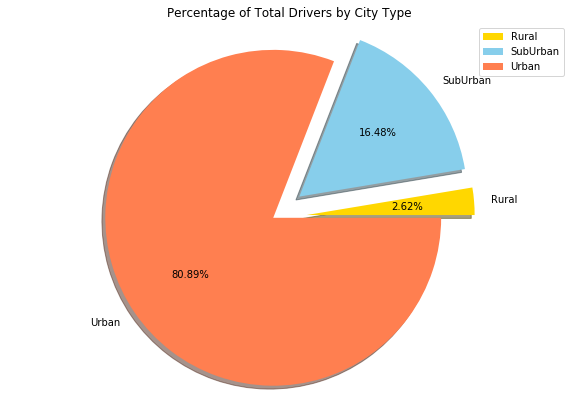

In [20]:
# Calculate Driver Percents

#Total driver count.

drivers_percent = city_data_df.groupby(["type"]).sum()["driver_count"]/city_data_df["driver_count"].sum()*100
drivers_percent


# Build Pie Charts
#Use the City Pie index for the wedge labels.city_drivers_pie.index

#Set the colors of each section of the pie chart.
colors = ["gold", "skyblue", "coral"]

#explode the first and second segments of the pie chart.

explode = (0.2,0.2,0)

#Create the pie chart.
plt.pie(drivers_percent, labels = ["Rural", "SubUrban","Urban"], colors = colors, autopct = "%1.2f%%",explode = explode, shadow = True)

#Tell Matplotlib that we want the chart to have equal axes.
plt.axis("equal")

#Add the legend.
plt.legend(loc = "best")
plt.title("Percentage of Total Drivers by City Type")


# Save Figure
plt.savefig("Percentage_of_Total_Drivers_by_CityType.png")

#Show the pie chart.
plt.show()

In [ ]:
##Observable Trends:-
    
#The Bubble Plot indicates that number of rides and drivers both are more in urban cities as compared to suburban and rural cities. 
#Data collected is for:
#Urban cities-       66
#Suburban cities-    36
#Rural cities-       18

# Urban cities have good percetage of drivers (above 80%). Urban cities have the highest percentage of total fares at 62.97% and highest percentage of total rides(approx 68.5%).
# Rural area has very small share of total rides, driver count and 
#We can predict that there could be opportunity to expand the business in suburban and rural cities